# Bernie Analysis

In [1]:
# importing the required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir( os.path.join("..", "..") )

from Code.src.modules.db_ops import *
from Code.src.modules.dataManager import DataManager
from Code.src.modules.eda import *

DM = DataManager()

In [2]:
# Importing the data
df_finalEnrollment = DM.get_data('EnrollmentFinalStatus', 'pkl', 'processed')
db_finalEnrollment = DM.get_data('EnrollmentFinalStatus', 'db', 'processed')

In [3]:
# Creating a new folder to store the output, if it doesn't exist
try:
    os.mkdir( os.path.join("Data", "02_processed", "BernieAnalytics") )
except:
    pass

In [4]:
df_finalEnrollment.reg_status.value_counts()

**Web Registered**                50631
Wait Listed                        4212
**Registered**                     2981
Drop-Course Cancelled               959
Drop/Delete                         485
Web Drop (Liability)                115
Web Withdrawal                       20
Registered for Audit                  2
Selective Withdrawal Exception        2
Withdrawal from Course                2
Name: reg_status, dtype: int64

# Queries
## Tables Most popular courses for Student Cohorts in their first semester

### First Semester Course Demand
Conditions:
- International Students only
- Fall Semesters only
- Data Analytics Engineering Program only
- Demand calculated as Registration Status is in ("Web Registered", "Wait Listed", "Registered")
- Core Courses only

In [28]:
query1 = db_finalEnrollment.runQuery(""" --sql
    SELECT
        stu_admit_term_desc AS Semester,
        COUNT(DISTINCT stu_id) AS 'Total International Students Admitted',
        SUM(CASE WHEN crs = 'AIT 580' THEN 1 ELSE 0 END) AS 'AIT 580',
        SUM(CASE WHEN crs = 'CS 504' THEN 1 ELSE 0 END) AS 'CS 504',
        SUM(CASE WHEN crs = 'STAT 515' THEN 1 ELSE 0 END) AS 'STAT 515',
        SUM(CASE WHEN crs = 'OR 531' THEN 1 ELSE 0 END) AS 'OR 531'
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "Wait Listed", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
        AND     reg_term_name = 'Fall'
    GROUP BY
        stu_admit_term_desc
    ORDER BY
        stu_admit_term_code
""")

# query1.to_csv( os.path.join("Data", "02_processed", "BernieAnalytics") , index=False)

In [6]:
query1

,Semester,Total International Students Admitted,AIT 580,CS 504,STAT 515,OR 531
0,Fall 2018,83,63,41,58,51
1,Fall 2019,78,59,46,59,51
2,Fall 2020,53,32,34,36,27
3,Fall 2021,149,131,116,132,94
4,Fall 2022,189,183,89,186,159


In [ ]:
# query1.set_index('stu_admit_term_desc').plot(
#     kind='line', figsize=(15, 8),
#     title = "Demand of core courses for Student Cohorts in their first semester (Fall only)",
#     xlabel = "Semesters (Fall only)",
#     ylabel = "Student Demand",
#     grid = True
# )

In [24]:
query2 = db_finalEnrollment.runQuery(""" --sql
    SELECT
        stu_admit_term_desc AS Semester,
        COUNT(DISTINCT stu_id) AS 'Total International Students Admitted',
        SUM(CASE WHEN crs = 'AIT 580' THEN 1 ELSE 0 END) AS 'AIT 580',
        SUM(CASE WHEN crs = 'CS 504' THEN 1 ELSE 0 END) AS 'CS 504',
        SUM(CASE WHEN crs = 'STAT 515' THEN 1 ELSE 0 END) AS 'STAT 515',
        SUM(CASE WHEN crs = 'OR 531' THEN 1 ELSE 0 END) AS 'OR 531'
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "Wait Listed", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
        AND     reg_term_name = 'Spring'
    GROUP BY
        stu_admit_term_desc
    ORDER BY
        stu_admit_term_code
""")

# query2.to_csv( os.path.join("Data", "02_processed", "BernieAnalytics") , index=False)

### First Semester Course Demand
Conditions:
- International Students only
- Spring Semesters only
- Data Analytics Engineering Program only
- Demand calculated as Registration Status is in ("Web Registered", "Wait Listed", "Registered")
- Core Courses only

In [25]:
query2

,Semester,Total International Students Admitted,AIT 580,CS 504,STAT 515,OR 531
0,Spring 2018,40,21,24,22,18
1,Spring 2019,48,28,23,33,24
2,Spring 2020 - COVID-19,66,43,41,52,44
3,Spring 2021,82,68,64,65,41
4,Spring 2022,119,112,82,113,76
5,Spring 2023,143,127,67,140,122


In [ ]:
# query2.set_index('stu_admit_term_desc').plot(
#     kind='line', figsize=(15, 8),
#     title = "Demand of core courses for Student Cohorts in their first semester (Fall only)",
#     xlabel = "Semesters (Spring only)",
#     ylabel = "Student Demand",
#     grid = True
# )

In [26]:
query3 = db_finalEnrollment.runQuery(""" --sql
    SELECT
        stu_admit_term_desc AS Semester,
        COUNT(DISTINCT stu_id) AS 'Total International Students Admitted',
        SUM(CASE WHEN crs = 'AIT 580' THEN 1 ELSE 0 END) AS 'AIT 580',
        SUM(CASE WHEN crs = 'CS 504' THEN 1 ELSE 0 END) AS 'CS 504',
        SUM(CASE WHEN crs = 'STAT 515' THEN 1 ELSE 0 END) AS 'STAT 515',
        SUM(CASE WHEN crs = 'OR 531' THEN 1 ELSE 0 END) AS 'OR 531'
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "Wait Listed", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
    GROUP BY
        stu_admit_term_desc
    ORDER BY
        stu_admit_term_code
""")

# query1.to_csv( os.path.join("Data", "02_processed", "BernieAnalytics") , index=False)

In [27]:
query3.T

,0,1,2,3,4,5,6,7,8,9,10
Semester,Spring 2018,Fall 2018,Spring 2019,Fall 2019,Spring 2020 - COVID-19,Fall 2020,Spring 2021,Fall 2021,Spring 2022,Fall 2022,Spring 2023
Total International Students Admitted,40,83,48,78,66,53,82,149,119,189,143
AIT 580,21,63,28,59,43,32,68,131,112,183,127
CS 504,24,41,23,46,41,34,64,116,82,89,67
STAT 515,22,58,33,59,52,36,65,132,113,186,140
OR 531,18,51,24,51,44,27,41,94,76,159,122


In [ ]:
# query2.set_index('stu_admit_term_desc').plot(
#     kind='line', figsize=(15, 8),
#     title = "Demand of core courses for Student Cohorts in their first semester (Fall only)",
#     xlabel = "Semesters (Spring only)",
#     ylabel = "Student Demand",
#     grid = True
# )

## Charts Demand Comparison among Core Courses for Data Analytics Engineering Program

## TODO:
- [ ] Add the table at the bottom of each chart

<Axes: title={'center': 'Demand of Core Courses\nStudent Preference in first semester\n("**Web Registered**", "**Registered**")'}, xlabel='Semester'>

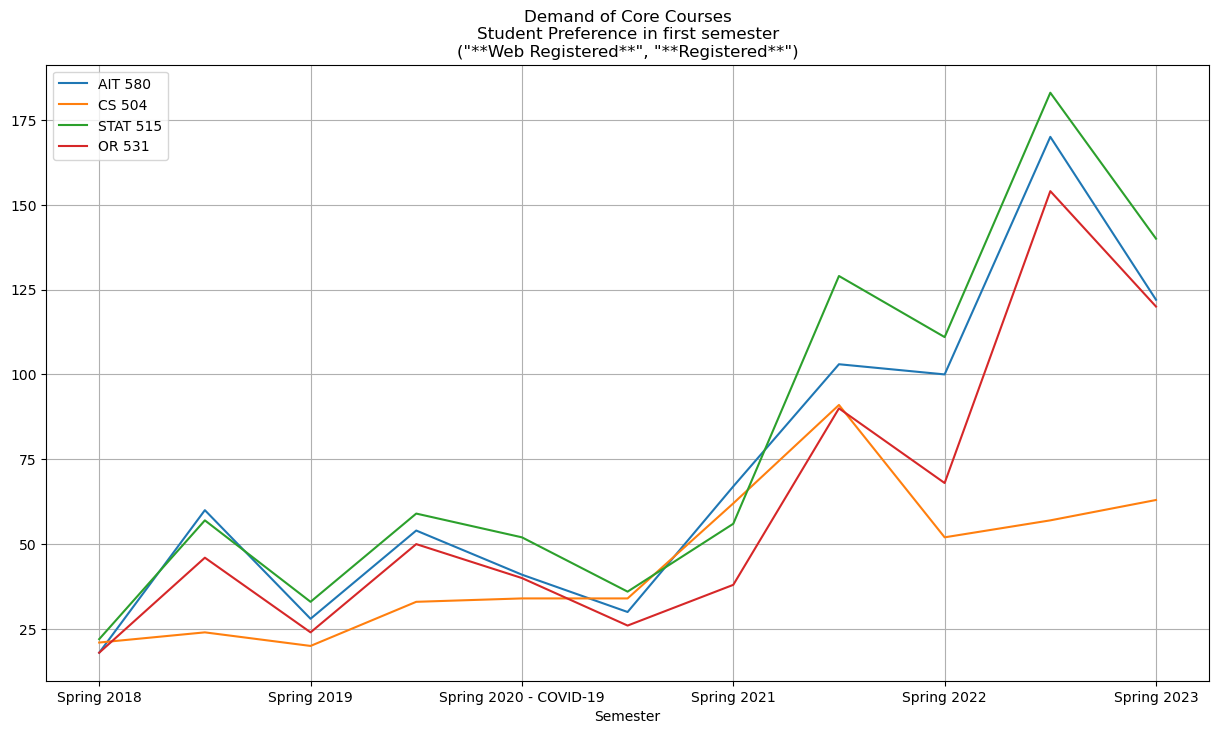

In [13]:
db_finalEnrollment.runQuery(""" --sql
    SELECT
        stu_admit_term_desc AS Semester,
        SUM(CASE WHEN crs = 'AIT 580' THEN 1 ELSE 0 END) AS 'AIT 580',
        SUM(CASE WHEN crs = 'CS 504' THEN 1 ELSE 0 END) AS 'CS 504',
        SUM(CASE WHEN crs = 'STAT 515' THEN 1 ELSE 0 END) AS 'STAT 515',
        SUM(CASE WHEN crs = 'OR 531' THEN 1 ELSE 0 END) AS 'OR 531'
        --SUM(CASE WHEN crs = 'OR 541' THEN 1 ELSE 0 END) AS 'OR 541',
        --SUM(CASE WHEN crs = 'STAT 554' THEN 1 ELSE 0 END) AS 'STAT 554',
        --SUM(CASE WHEN crs = 'CS 584' THEN 1 ELSE 0 END) AS 'CS 584',
        --COUNT(DISTINCT stu_id) AS 'Total Semester Intake'
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
        --AND     reg_term_name = 'Spring'
    GROUP BY
        stu_admit_term_desc
    ORDER BY
        stu_admit_term_code
""")\
    .set_index('Semester') \
        .plot(kind='line', figsize=(15, 8),
              title = 'Demand of Core Courses\nStudent Preference in first semester\n("**Web Registered**", "**Registered**")',
              grid = True
        )

<Axes: title={'center': 'Demand of Core Courses\nStudent Preference in first semester\n("**Web Registered**", "**Registered**")'}, xlabel='Semester'>

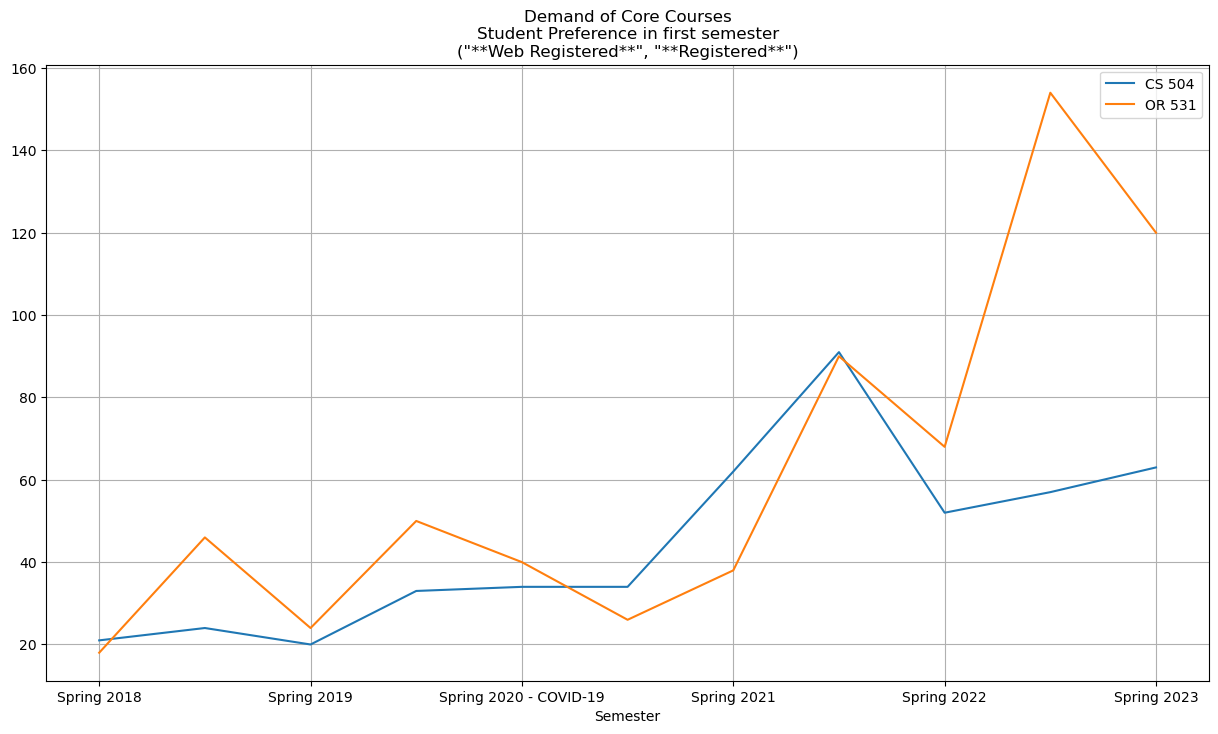

In [19]:
db_finalEnrollment.runQuery(""" --sql
    SELECT
        stu_admit_term_desc AS Semester,
        --SUM(CASE WHEN crs = 'AIT 580' THEN 1 ELSE 0 END) AS 'AIT 580',
        SUM(CASE WHEN crs = 'CS 504' THEN 1 ELSE 0 END) AS 'CS 504',
        --SUM(CASE WHEN crs = 'STAT 515' THEN 1 ELSE 0 END) AS 'STAT 515',
        SUM(CASE WHEN crs = 'OR 531' THEN 1 ELSE 0 END) AS 'OR 531'
        --SUM(CASE WHEN crs = 'OR 541' THEN 1 ELSE 0 END) AS 'OR 541',
        --SUM(CASE WHEN crs = 'STAT 554' THEN 1 ELSE 0 END) AS 'STAT 554',
        --SUM(CASE WHEN crs = 'CS 584' THEN 1 ELSE 0 END) AS 'CS 584',
        --COUNT(DISTINCT stu_id) AS 'Total Semester Intake'
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
        --AND     reg_term_name = 'Spring'
    GROUP BY
        stu_admit_term_desc
    ORDER BY
        stu_admit_term_code
""")\
    .set_index('Semester') \
        .plot(kind='line', figsize=(15, 8),
              title = 'Demand of Core Courses\nStudent Preference in first semester\n("**Web Registered**", "**Registered**")',
              grid = True
        )

<Axes: title={'center': 'Demand of Core Courses\nStudent Preference in first semester\n("**Web Registered**", "Wait Listed", "**Registered**")'}, xlabel='Semester'>

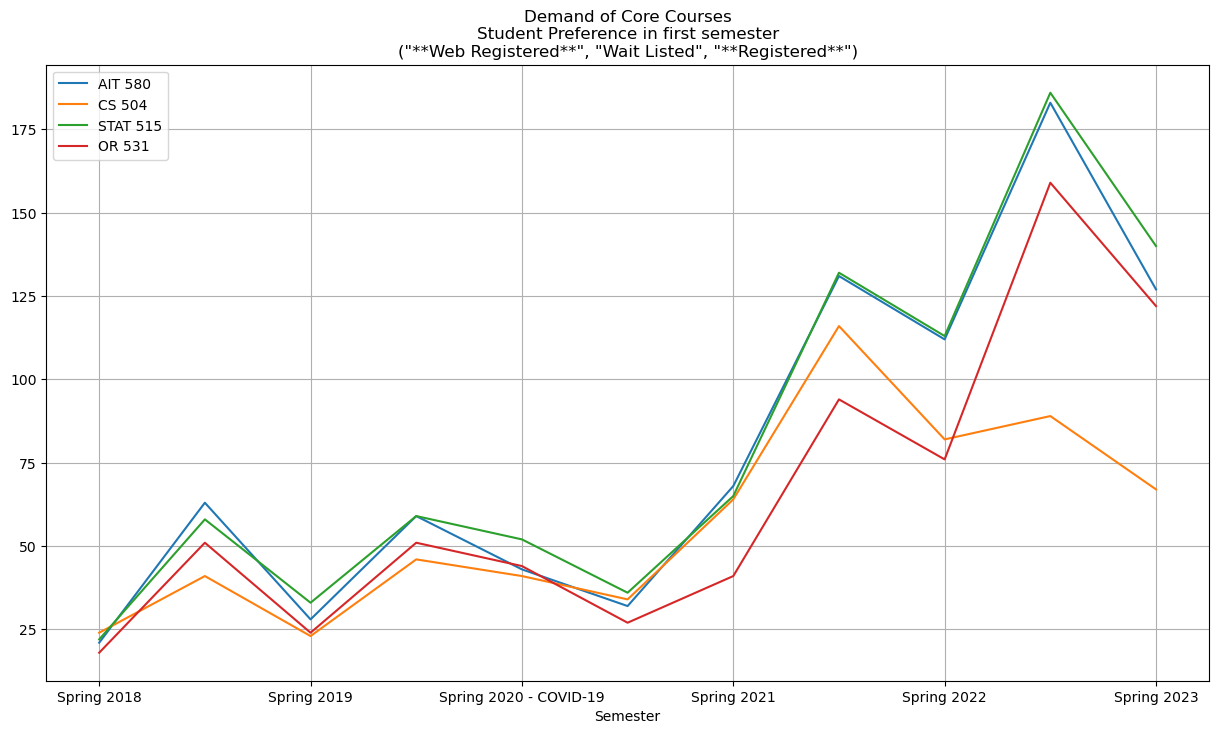

In [20]:
db_finalEnrollment.runQuery(""" --sql
    SELECT
        stu_admit_term_desc AS Semester,
        SUM(CASE WHEN crs = 'AIT 580' THEN 1 ELSE 0 END) AS 'AIT 580',
        SUM(CASE WHEN crs = 'CS 504' THEN 1 ELSE 0 END) AS 'CS 504',
        SUM(CASE WHEN crs = 'STAT 515' THEN 1 ELSE 0 END) AS 'STAT 515',
        SUM(CASE WHEN crs = 'OR 531' THEN 1 ELSE 0 END) AS 'OR 531'
        --SUM(CASE WHEN crs = 'OR 541' THEN 1 ELSE 0 END) AS 'OR 541',
        --SUM(CASE WHEN crs = 'STAT 554' THEN 1 ELSE 0 END) AS 'STAT 554',
        --SUM(CASE WHEN crs = 'CS 584' THEN 1 ELSE 0 END) AS 'CS 584',
        --COUNT(DISTINCT stu_id) AS 'Total Semester Intake'
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "Wait Listed", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
        --AND     reg_term_name = 'Spring'
    GROUP BY
        stu_admit_term_desc
    ORDER BY
        stu_admit_term_code
""")\
    .set_index('Semester') \
        .plot(kind='line', figsize=(15, 8),
              title = 'Demand of Core Courses\nStudent Preference in first semester\n("**Web Registered**", "Wait Listed", "**Registered**")',
              grid = True
        )

<Axes: title={'center': 'Demand of Core Courses\nStudent Preference in first semester\n("**Web Registered**", "Wait Listed", "**Registered**")'}, xlabel='Semester'>

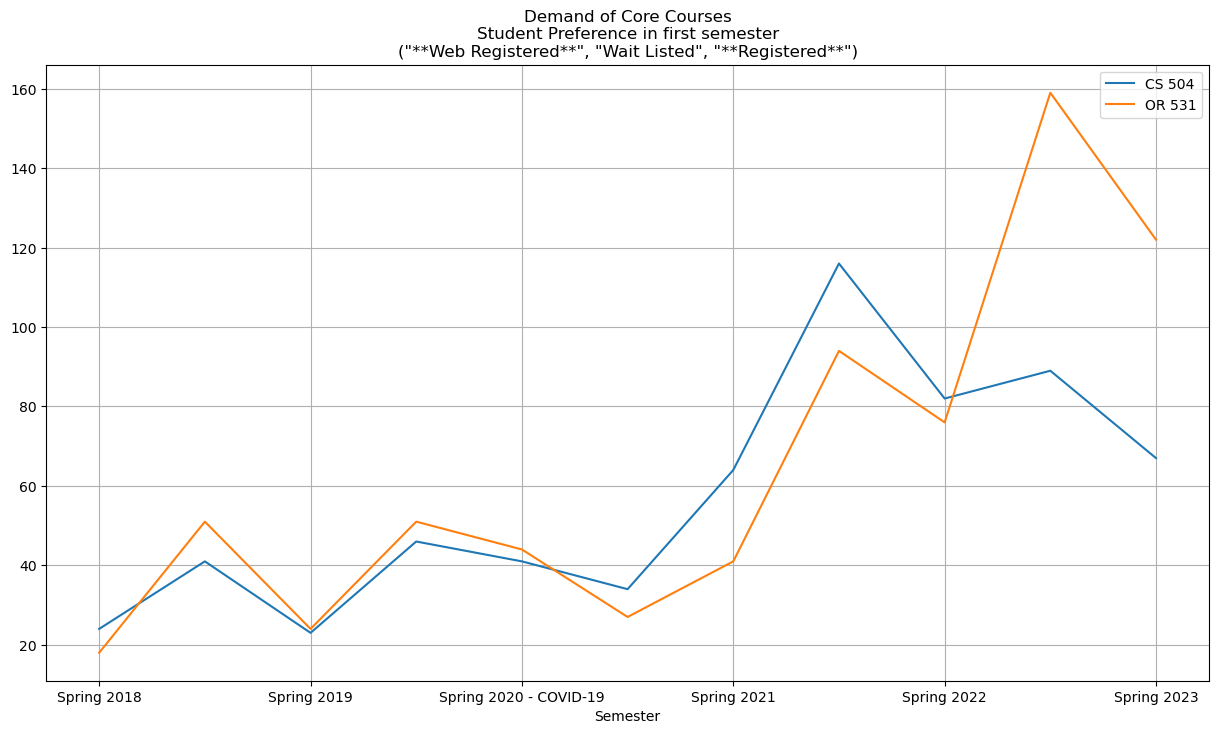

In [21]:
db_finalEnrollment.runQuery(""" --sql
    SELECT
        stu_admit_term_desc AS Semester,
        --SUM(CASE WHEN crs = 'AIT 580' THEN 1 ELSE 0 END) AS 'AIT 580',
        SUM(CASE WHEN crs = 'CS 504' THEN 1 ELSE 0 END) AS 'CS 504',
        --SUM(CASE WHEN crs = 'STAT 515' THEN 1 ELSE 0 END) AS 'STAT 515',
        SUM(CASE WHEN crs = 'OR 531' THEN 1 ELSE 0 END) AS 'OR 531'
        --SUM(CASE WHEN crs = 'OR 541' THEN 1 ELSE 0 END) AS 'OR 541',
        --SUM(CASE WHEN crs = 'STAT 554' THEN 1 ELSE 0 END) AS 'STAT 554',
        --SUM(CASE WHEN crs = 'CS 584' THEN 1 ELSE 0 END) AS 'CS 584',
        --COUNT(DISTINCT stu_id) AS 'Total Semester Intake'
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "Wait Listed", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
        --AND     reg_term_name = 'Spring'
    GROUP BY
        stu_admit_term_desc
    ORDER BY
        stu_admit_term_code
""")\
    .set_index('Semester') \
        .plot(kind='line', figsize=(15, 8),
              title = 'Demand of Core Courses\nStudent Preference in first semester\n("**Web Registered**", "Wait Listed", "**Registered**")',
              grid = True
        )

## Blah

In [52]:
db_finalEnrollment.runQuery(""" --sql
    SELECT
        crs, stu_admit_term_desc,
        COUNT(DISTINCT stu_id) AS Average_Enrollment
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "Wait Listed", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
        --AND     crs IN ('AIT 580', 'CS 504', 'STAT 515', 'OR 531', 'OR 541', 'STAT 554', 'CS 584')
        --AND     reg_term_name = 'Fall'
    GROUP BY
        crs, stu_admit_term_desc
    ORDER BY
        stu_admit_term_code
""") \
    .groupby('crs') \
        .agg({'Average_Enrollment': 'mean'}) \
            .sort_values('Average_Enrollment', ascending=False) \
                .head(10)

,Average_Enrollment
crs,
STAT 515,81.454545
AIT 580,78.818182
OR 531,64.272727
CS 504,57.000000
SYST 584,11.500000
AIT 524,9.363636
AIT 582,6.333333
OR 541,6.300000
CFRS 661,6.000000


In [18]:
db_finalEnrollment.runQuery(""" --sql
    SELECT
        stu_admit_term_desc, crs, COUNT(DISTINCT stu_id) AS dem_sem_1
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "Wait Listed", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
        --AND     crs IN ('AIT 580', 'CS 504', 'STAT 515', 'OR 531', 'OR 541', 'STAT 554', 'CS 584')
        AND     reg_term_name = 'Spring'
    GROUP BY
        stu_admit_term_desc, crs
    ORDER BY
        stu_admit_term_code, dem_sem_1 DESC
""").pivot(
    index = 'crs',
    columns = 'stu_admit_term_desc',
    values = 'dem_sem_1'
).head(60)

stu_admit_term_desc,Spring 2018,Spring 2019,Spring 2020 - COVID-19,Spring 2021,Spring 2022,Spring 2023
crs,,,,,,
AIT 524,8.0,20.0,16.0,9.0,5.0,2.0
AIT 580,21.0,28.0,43.0,68.0,112.0,127.0
AIT 582,3.0,6.0,10.0,NaN,2.0,NaN
AIT 614,2.0,NaN,12.0,4.0,5.0,1.0
AIT 622,3.0,3.0,6.0,3.0,2.0,2.0
AIT 636,NaN,NaN,NaN,NaN,NaN,2.0
AIT 664,1.0,4.0,5.0,1.0,5.0,1.0
AIT 690,NaN,1.0,NaN,NaN,NaN,NaN
AIT 726,NaN,NaN,NaN,2.0,NaN,NaN
